[View in Colaboratory](https://colab.research.google.com/github/RaulMedeiros/Colab_paper/blob/master/Mask_R_CNN_for_Object_Detection_and_Segmentation.ipynb)

#Mask R-CNN for Object Detection and Segmentation

This is an implementation of Mask R-CNN on Python 3, Keras, and TensorFlow. The model generates bounding boxes and segmentation masks for each instance of an object in the image. It's based on Feature Pyramid Network (FPN) and a ResNet101 backbone.

https://arxiv.org/abs/1703.06870

https://github.com/RaulMedeiros/Mask_RCNN

https://github.com/RaulMedeiros/coco

### Dowload and install MASK R-CNN implementation


In [18]:
!git clone https://github.com/RaulMedeiros/Mask_RCNN
import os
os.chdir("./Mask_RCNN")
!ls

Cloning into 'Mask_RCNN'...
remote: Counting objects: 721, done.
remote: Total 721 (delta 0), reused 0 (delta 0), pack-reused 721
Receiving objects: 100% (721/721), 107.27 MiB | 38.18 MiB/s, done.
Resolving deltas: 100% (403/403), done.
assets	LICENSE      mrcnn	requirements.txt  setup.cfg
images	MANIFEST.in  README.md	samples		  setup.py


In [19]:
!pip install -r requirements.txt

In [20]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/l

In [21]:
!ls

assets	images	     mask_rcnn.egg-info  requirements.txt  setup.py
build	LICENSE      mrcnn		 samples
dist	MANIFEST.in  README.md		 setup.cfg


### Dowload and install MS-COCO dataset Python API 

Microsoft COCO is a large image dataset designed for object detection, segmentation, and caption generation. This package provides Matlab, Python, and Lua APIs that assists in loading, parsing, and visualizing the annotations in COCO. Please visit http://mscoco.org/ for more information on COCO, including for the data, paper, and tutorials.

In [22]:
!git clone https://github.com/RaulMedeiros/coco
os.chdir("./coco/PythonAPI")
!ls
!pwd
!make
!make install
!python setup.py install

Cloning into 'coco'...
remote: Counting objects: 904, done.
remote: Total 904 (delta 0), reused 0 (delta 0), pack-reused 904
Receiving objects: 100% (904/904), 10.39 MiB | 27.14 MiB/s, done.
Resolving deltas: 100% (541/541), done.
Makefile  pycocoDemo.ipynb  pycocoEvalDemo.ipynb  pycocotools  setup.py
/content/Mask_RCNN/Mask_RCNN/coco/PythonAPI
python setup.py build_ext --inplace
Compiling pycocotools/_mask.pyx because it changed.
[1/1] Cythonizing pycocotools/_mask.pyx
running build_ext
building 'pycocotools._mask' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
creating build/common
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -Wstrict-prototypes -g -fdebug-prefix-map=/build/python3.6-sXpGnM/python3.6-3.6.3=. -specs=/usr/share/dpkg/no-pie-compile.specs -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -

running install
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.6
creating build/lib.linux-x86_64-3.6/pycocotools
copying pycocotools/mask.py -> build/lib.linux-x86_64-3.6/pycocotools
copying pycocotools/coco.py -> build/lib.linux-x86_64-3.6/pycocotools
copying pycocotools/cocoeval.py -> build/lib.linux-x86_64-3.6/pycocotools
copying pycocotools/__init__.py -> build/lib.linux-x86_64-3.6/pycocotools
running build_ext
building 'pycocotools._mask' extension
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
creating build/common
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -Wstrict-prototypes -g -fdebug-prefix-map=/build/python3.6-sXpGnM/python3.6-3.6.3=. -specs=/usr/share/dpkg/no-pie-compile.specs -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/usr/include/python3.6m -c pycocotools/_mas

In [23]:
os.chdir("/content/Mask_RCNN")
!pwd
!ls

/content/Mask_RCNN
assets	dist	 logs	      mask_rcnn_coco.h5   README.md	    setup.cfg
build	images	 MANIFEST.in  mask_rcnn.egg-info  requirements.txt  setup.py
coco	LICENSE  Mask_RCNN    mrcnn		  samples


### Download pre-trained weights (on MS-COCO)

In [0]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("/content/Mask_RCNN")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

### Configurations

We'll be using a model trained on the MS-COCO dataset. The configurations of this model are in the ```CocoConfig``` class in ```coco.py```.

For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the ```CocoConfig``` class and override the attributes you need to change.

In [25]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

### Create Model and Load Trained Weights

In [0]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

### Converting the output IDs into names

The model classifies objects and returns class IDs, which are integer value that identify each class.
However, we don't want to require you to download the COCO dataset just to run this demo, so we're including the list of class names below. 
The index of the class name in the list represent its ID (first class is 0, second is 1, third is 2, ...etc.)

In [0]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

# Run Object Detection

In [0]:
import time
current_milli_time = lambda: int(round(time.time() * 1000))

num_exec = 5

def run(img_path ='/content/src.jpg',visual=True,verbose=1):
  # Load the uploaded image
  image = skimage.io.imread(img_path)

  # Run detection
  results = model.detect([image], verbose=verbose)

  # Visualize results
  if(visual):
    r = results[0]
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                              class_names, r['scores'])

### Try with on your onw image.
### just replace the urls bellow and run the these last cells again.

In [29]:
url1 ="http://sportsmate.in/wp-content/uploads/2018/06/brazil-football-commons.jpg"
!wget -O /content/src1.jpg $url1

url2 ="https://upload.wikimedia.org/wikipedia/commons/3/3e/I-80_Eastshore_Fwy.jpg"
!wget -O /content/src2.jpg $url2

url3 ="https://c1.staticflickr.com/4/3512/3225492552_05f59dee29_b.jpg"
!wget -O /content/src3.jpg $url3

--2018-07-27 19:52:06--  http://sportsmate.in/wp-content/uploads/2018/06/brazil-football-commons.jpg
Resolving sportsmate.in (sportsmate.in)... 43.255.154.115
Connecting to sportsmate.in (sportsmate.in)|43.255.154.115|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109682 (107K) [image/jpeg]
Saving to: ‘/content/src1.jpg’

/content/src1.jpg   100%[===================>] 107.11K   123KB/s    in 0.9s    

2018-07-27 19:52:08 (123 KB/s) - ‘/content/src1.jpg’ saved [109682/109682]

--2018-07-27 19:52:09--  https://upload.wikimedia.org/wikipedia/commons/3/3e/I-80_Eastshore_Fwy.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 311297 (304K) [image/jpeg]
Saving to: ‘/content/src2.jpg’

/content/src2.jpg   100%[===================>] 304.00K  --.-KB/s    in 0.05s   

2018-07-27 1

### GPU

EXE TIME src1 : 924.2
Processing 1 images
image                    shape: (443, 760, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


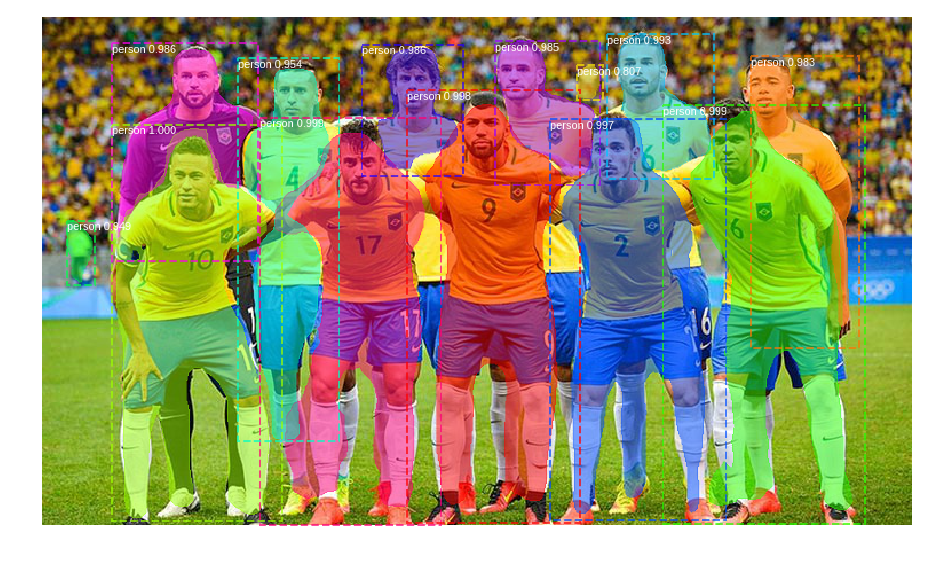

In [25]:
time_start = current_milli_time()
for x in range(num_exec):
  run("/content/src1.jpg",visual=False,verbose=0)

print('EXE TIME src1 :',(current_milli_time()-time_start)/num_exec)
  
run("/content/src1.jpg")

EXE TIME src2 : 3248.2
Processing 1 images
image                    shape: (1152, 1600, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1600.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


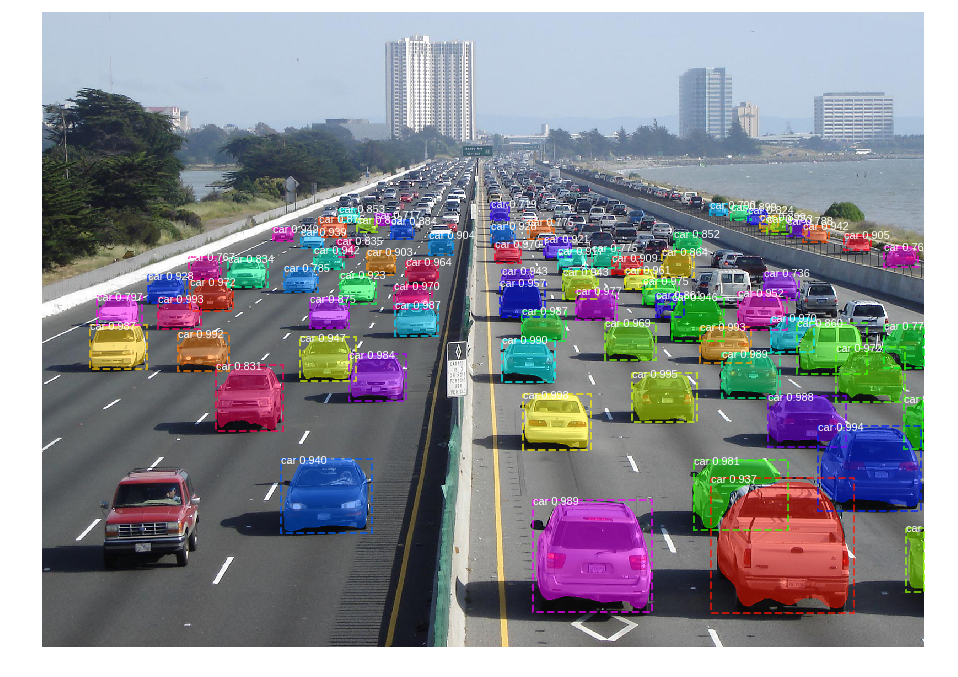

In [16]:
time_start = current_milli_time()
for x in range(num_exec):
  run("/content/src2.jpg",visual=False,verbose=0)

print('EXE TIME src2 :',(current_milli_time()-time_start)/num_exec)
  
run("/content/src2.jpg")

EXE TIME src3 : 808.0
Processing 1 images
image                    shape: (686, 1024, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


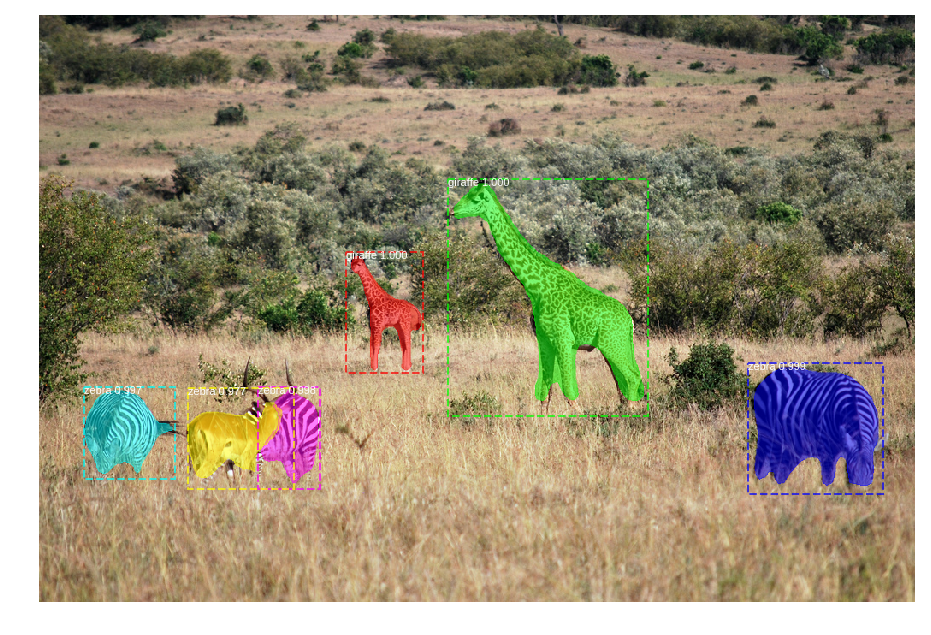

In [18]:
time_start = current_milli_time()
for x in range(num_exec):
  run("/content/src3.jpg",visual=False,verbose=0)

print('EXE TIME src3 :',(current_milli_time()-time_start)/num_exec)
  
run("/content/src3.jpg")

### CPU only

EXE TIME src1 : 15839.0
Processing 1 images
image                    shape: (443, 760, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


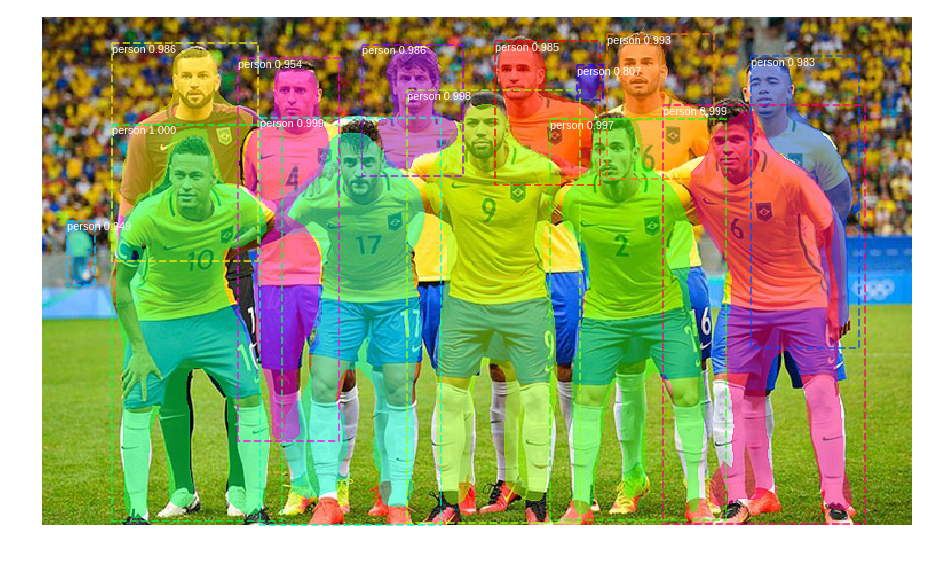

In [14]:
time_start = current_milli_time()
for x in range(num_exec):
  run("/content/src1.jpg",visual=False,verbose=0)
print('EXE TIME src1 :',(current_milli_time()-time_start)/num_exec)

run("/content/src1.jpg")

EXE TIME src2 : 16984.6
Processing 1 images
image                    shape: (1152, 1600, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1600.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


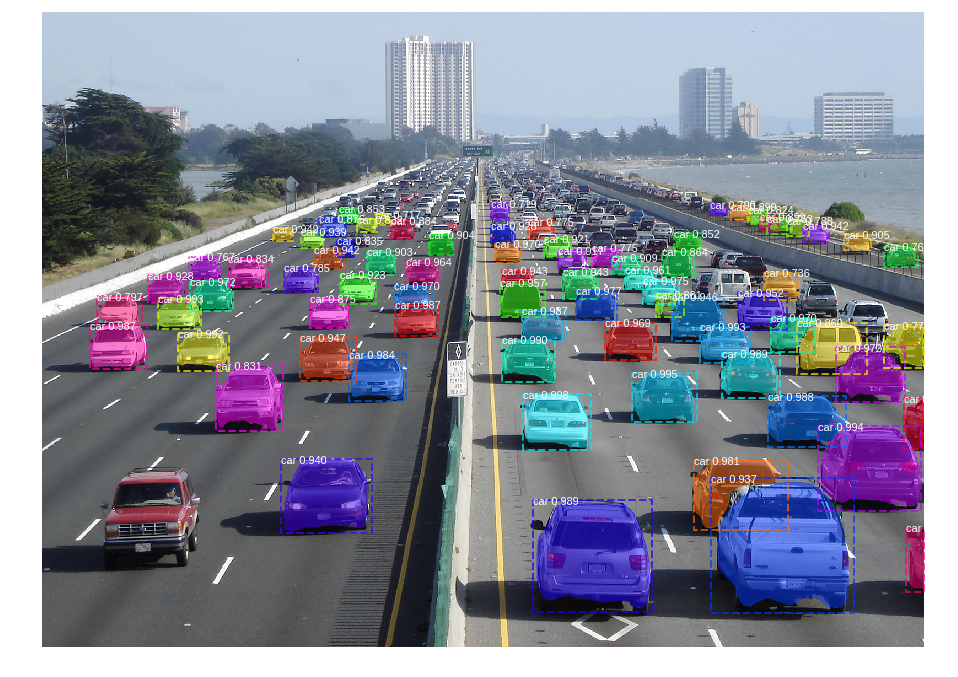

In [15]:
time_start = current_milli_time()
for x in range(num_exec):
  run("/content/src2.jpg",visual=False,verbose=0)
print('EXE TIME src2 :',(current_milli_time()-time_start)/num_exec)
  
run("/content/src2.jpg")

EXE TIME src3 : 15910.6
Processing 1 images
image                    shape: (686, 1024, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


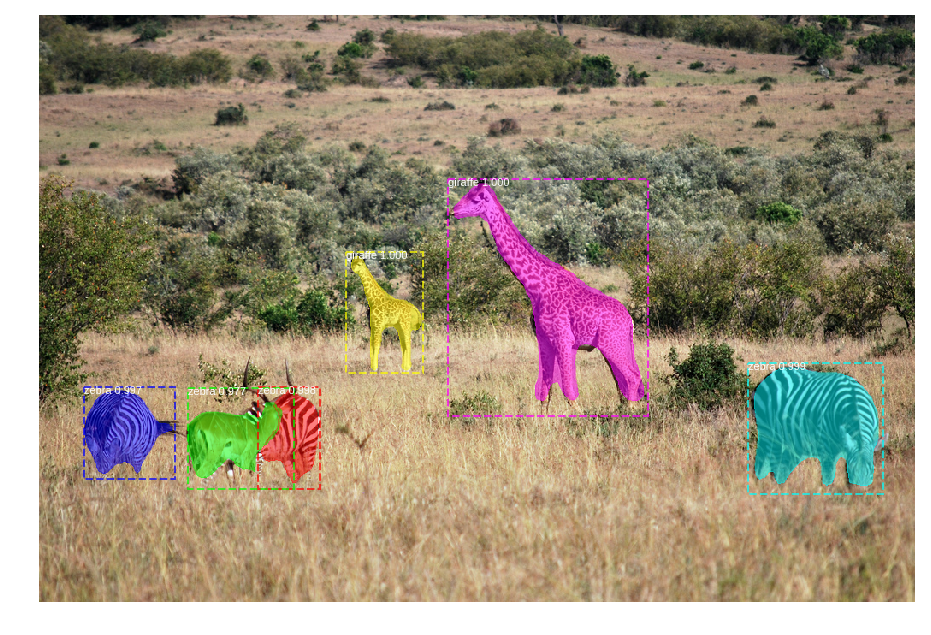

In [30]:
time_start = current_milli_time()
for x in range(num_exec):
  run("/content/src3.jpg",visual=False,verbose=0)
print('EXE TIME src3 :',(current_milli_time()-time_start)/num_exec)
  
run("/content/src3.jpg")